## Dual moving average strategy on single asset with stop loss & take profit using vectorbt

We start with a simple hard stop Stop Loss (SL) and Take Profit (TP) mechanism first

- stop loss: 2.5% downside from entry price
- profit target: 5.0% upside from entry price

In [1]:
# dual moving average strategy on single asset
import vectorbt as vbt
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings("ignore")

### 1. Get price data from yahoo finance

In [2]:
btc_price = vbt.YFData.download("MSFT", start="2020-01-01")
btc_close_price = btc_price.get("Close")
print(btc_close_price)

Date
2019-12-31 05:00:00+00:00    152.596542
2020-01-02 05:00:00+00:00    155.422028
2020-01-03 05:00:00+00:00    153.486771
2020-01-06 05:00:00+00:00    153.883530
2020-01-07 05:00:00+00:00    152.480423
                                ...    
2023-08-03 04:00:00+00:00    326.660004
2023-08-04 04:00:00+00:00    327.779999
2023-08-07 04:00:00+00:00    330.109985
2023-08-08 04:00:00+00:00    326.049988
2023-08-09 04:00:00+00:00    322.325012
Name: Close, Length: 908, dtype: float64


### 2. Setup criteria for entry and exit points

In [3]:
SMA12 = vbt.MA.run(btc_close_price, window=12)
SMA24 = vbt.MA.run(btc_close_price, window=24)

In [4]:
entries = SMA12.ma_crossed_above(SMA24)
exits = SMA24.ma_crossed_above(SMA12)

### 3. Run the backtest

In [5]:
pf = vbt.Portfolio.from_signals(btc_close_price, 
                                entries, exits, 
                                init_cash=1000, # in $1000,
                                fees=0.0025, # in 0.25 % 
                                slippage = 0.0025, # in 0.25 %
                                sl_stop = 0.025, # in 2.5%
                                tp_stop = 0.025, # in 2.5%
                                )

# sl_stop – responsible for % of stop loss. If you’ll pass the value of 0.025 for example it is equal to 2.5%.
# tp_stop – responsible for % of take profit (profit target). The value of 0.05 in my example is equal to 5%.

pf.stats()

Start                         2019-12-31 05:00:00+00:00
End                           2023-08-09 04:00:00+00:00
Period                                              908
Start Value                                      1000.0
End Value                                   1085.234205
Total Return [%]                                8.52342
Benchmark Return [%]                         111.226943
Max Gross Exposure [%]                            100.0
Total Fees Paid                              105.843702
Max Drawdown [%]                              15.749082
Max Drawdown Duration                             406.0
Total Trades                                         19
Total Closed Trades                                  19
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  63.157895
Best Trade [%]                                   5.4651
Worst Trade [%]                               -6

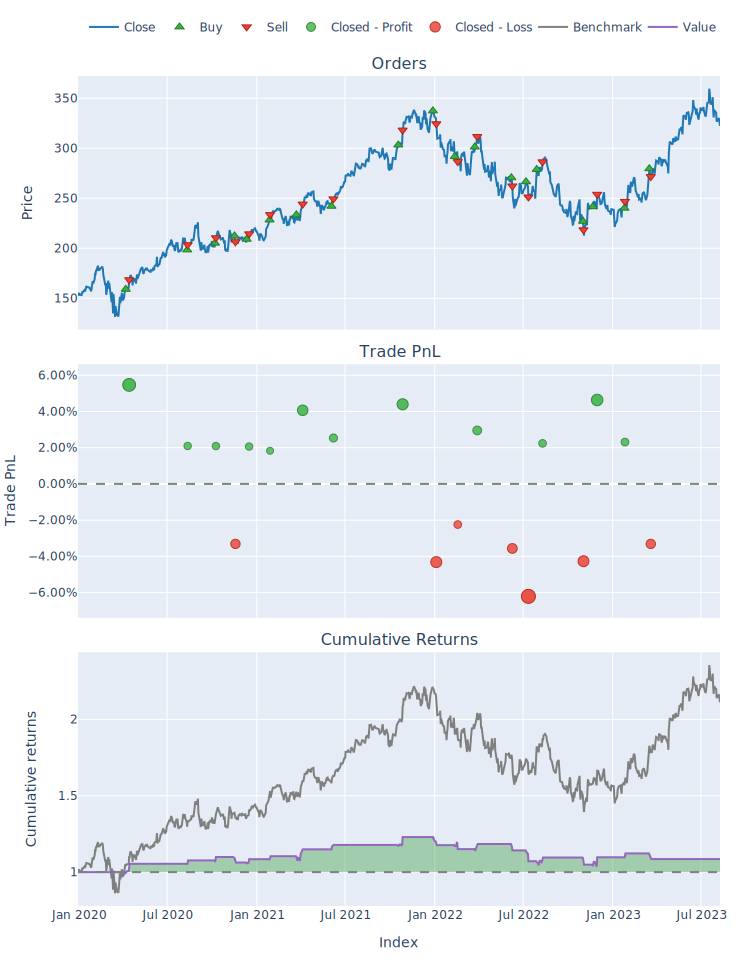

In [6]:
pf.plot().show_svg()

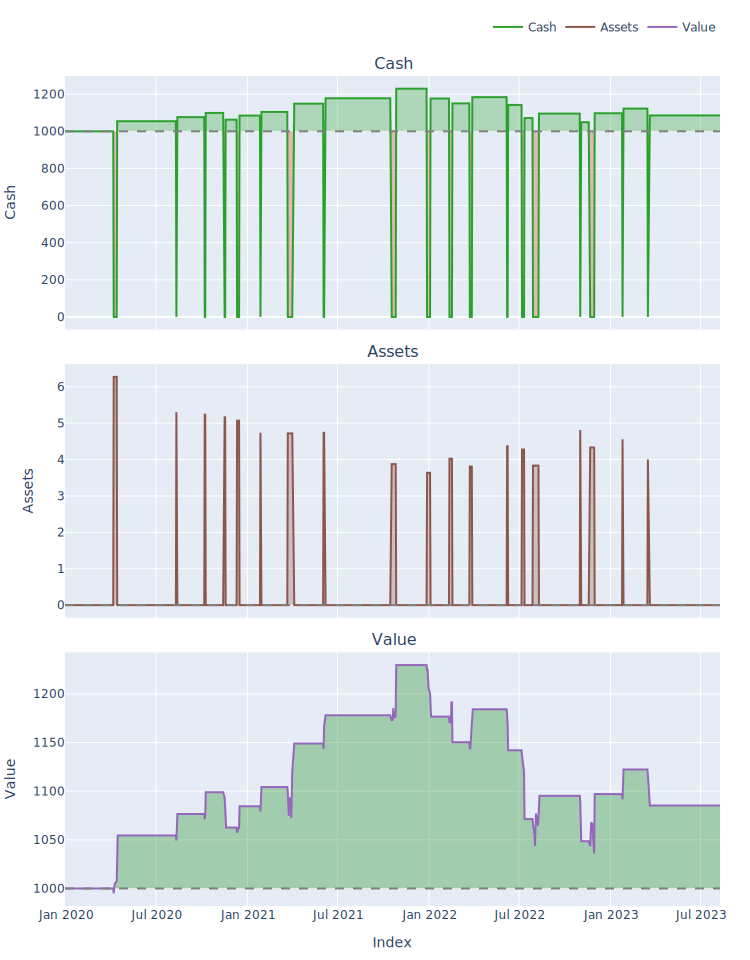

In [7]:
pf.plot(subplots=["cash", "assets","value"]).show_svg()